# **Project Name- Netflix Movies and TV Shows Clustering** 

# **Project Type**    - **Unsupervised ML**
#**Contribution**    - **Individual- Ayushman Dubey**

# **Project Summary -**

* Netflix is the world's largest online streaming service provider with over 220 million subscribers as of 2022-Q2.

* Effective clustering of shows on the Netflix platform is crucial for enhancing the user experience and preventing subscriber churn.

* The goal of the project is to classify/group Netflix shows into clusters based on similarity, allowing for personalized show suggestions to users.

* The dataset used for this project consists of TV shows and movies available on Netflix as of 2019, collected from Flixable, a third-party Netflix search engine.

* A report from 2018 revealed that the number of TV shows on Netflix has nearly tripled since 2010, while the number of movies has decreased by over 2,000 titles.

* Exploring the dataset can uncover further insights, such as understanding the types of content available in different countries and whether Netflix has shifted its focus more towards TV shows in recent years.

* Integrating external datasets like IMDB ratings and Rotten Tomatoes can provide additional interesting findings.

* Exploratory data analysis can help in understanding the distribution of content types, analyzing trends over time, and identifying patterns or relationships in the data.

* Text-based features can be utilized to cluster similar content, allowing for a better understanding of the relationships between different shows and movies on Netflix.

* Clustering shows on Netflix based on similarity can enable the platform to offer personalized recommendations to users, improving user engagement and satisfaction.

* The dataset from Flixable provides an opportunity to explore the growth and evolution of Netflix's content library, particularly the shift towards producing and acquiring more TV shows.

* Analyzing the distribution of content types in different countries can reveal regional preferences and help Netflix tailor its offerings to specific markets.

* By integrating external datasets such as IMDB ratings and Rotten Tomatoes, Netflix can gain insights into the quality and popularity of its content, which can inform decision-making processes related to acquisitions and content production.

* Clustering shows based on text-based features, such as genre, description, or cast information, can uncover hidden patterns and similarities among different titles, allowing for more targeted content recommendations and a better understanding of user preferences.

* These points provide an overview of the objectives, dataset, insights, and methods involved in the project.





# **GitHub Link -**

link provide here

# **Problem Statement**


## <b> Problem Description </b>


**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.**

**In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.**

**Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.**

# **Data Description** 


# **Attribute Information:** 

* 1. show_id : Unique ID for every Movie / Tv Show

* 2. type : Identifier - A Movie or TV Show

* 3. title : Title of the Movie / Tv Show

* 4. director : Director of the Movie

* 5. cast : Actors involved in the movie / show

* 6. country : Country where the movie / show was produced

* 7. date_added : Date it was added on Netflix

* 8. release_year : Actual Release year of the movie / show

* 9. rating : TV Rating of the movie / show

* 10. duration : Total Duration - in minutes or number of seasons

* 11. listed_in : Genre

* 12. description: The Summary description

# ***Let's Begin !***

## ***Know Your Data***

### Import Libraries

In [105]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [106]:
# Loading Dataset
#let's mount the google drive for import the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
#Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [108]:
#top 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [109]:
#last 5 rows
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [110]:
# Checking the shape of the dataframe
df.shape

(7787, 12)

In [111]:
# Columns name
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

* There are 12 columns

In [112]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# **Data processing**

In [113]:
#Droping duplicates 
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


* No duplicated values are found in Dataset

# **Handling Null values**

In [114]:
#Checking Null Values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [115]:
#total null values
df.isnull().sum().sum()

3631

*  The dataset contains a total of 3,631 null values, with 2,389 of them found in the director column, 718 in the cast column, 507 in the country column, 10 in the date_added column, and 7 in the rating column. It is necessary to address these null values and handle them appropriately.

In [116]:
#Handling Null Values
df['cast'].fillna(value='No cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [117]:
#'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset
df.dropna(subset=['date_added','rating'],inplace=True)

In [118]:
#Dropping Director Column
df.drop(['director'],axis=1,inplace=True)

In [119]:
#again checking for the presence of null values
df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# **Exploratory Data Analysis**

**1. Count of Movies and TV Shows**

In [120]:
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

object
Movie      5372
TV Show    2398
Name: type, dtype: int64


<Axes: xlabel='type', ylabel='count'>

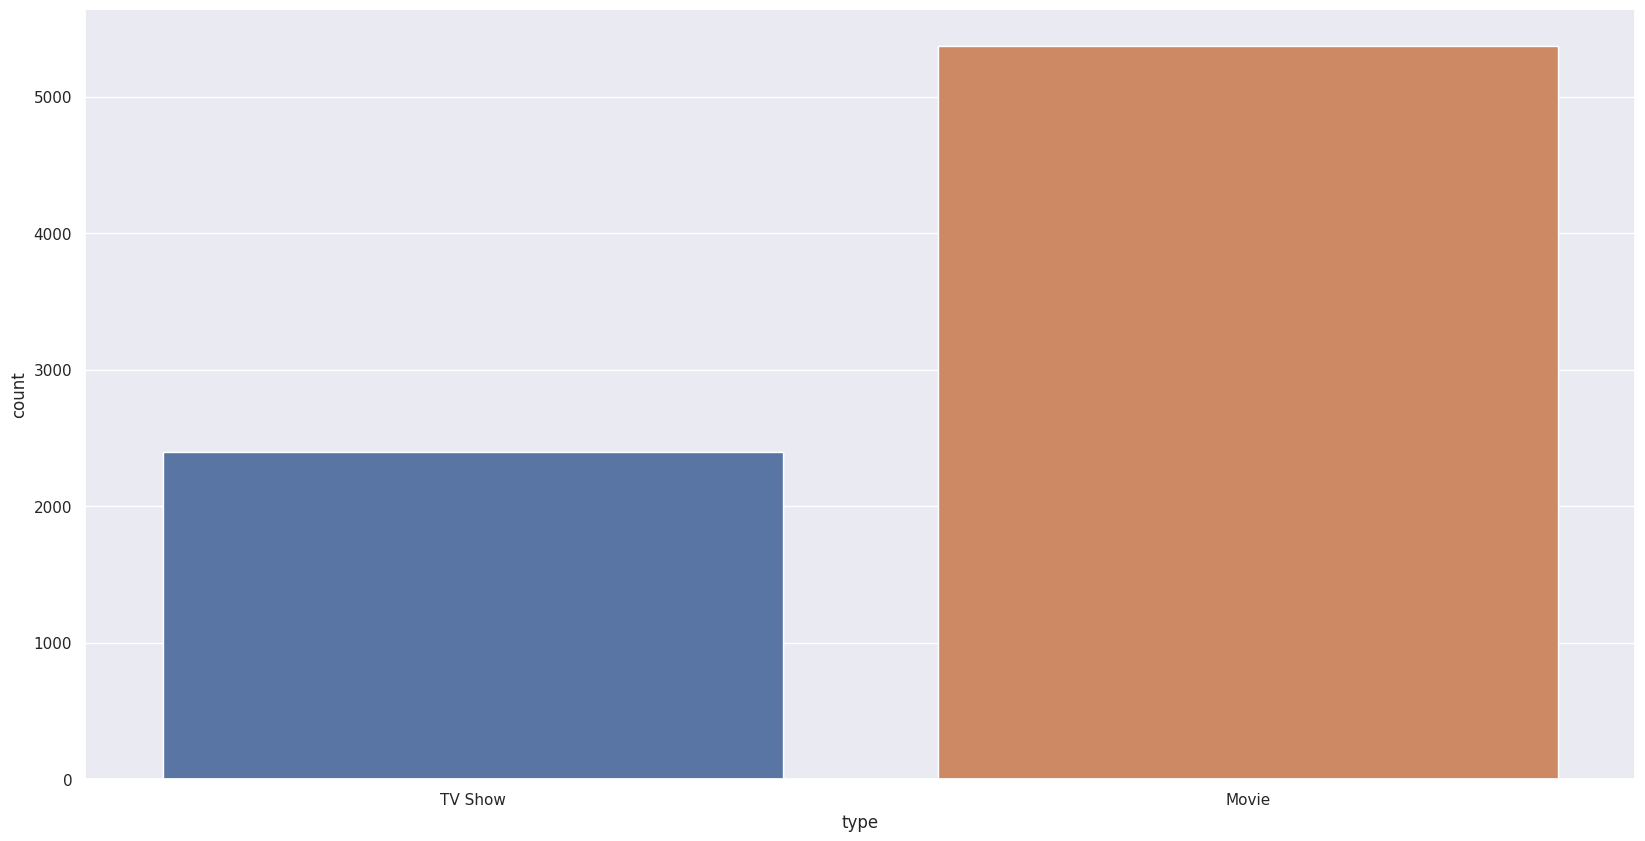

In [121]:
#Countplot to visualize the number of movies and tv_shows in type column
# Check the data type of the 'type' column
print(df['type'].dtype)

# Check the unique values and their counts in the 'type' column
print(df['type'].value_counts())

# Visualize the number of movies and TV shows using countplot
sns.countplot(data=df, x='type')

# If the data type is not object or string, convert it
df['type'] = df['type'].astype(str)

# Handle missing values if any
df['type'].fillna('Unknown', inplace=True)

# Map incorrect values to the correct ones if needed
df['type'].replace({'TV Show ': 'TV Show'}, inplace=True)

# Visualize the updated countplot
sns.countplot(data=df, x='type')


object
Movie      5372
TV Show    2398
Name: type, dtype: int64


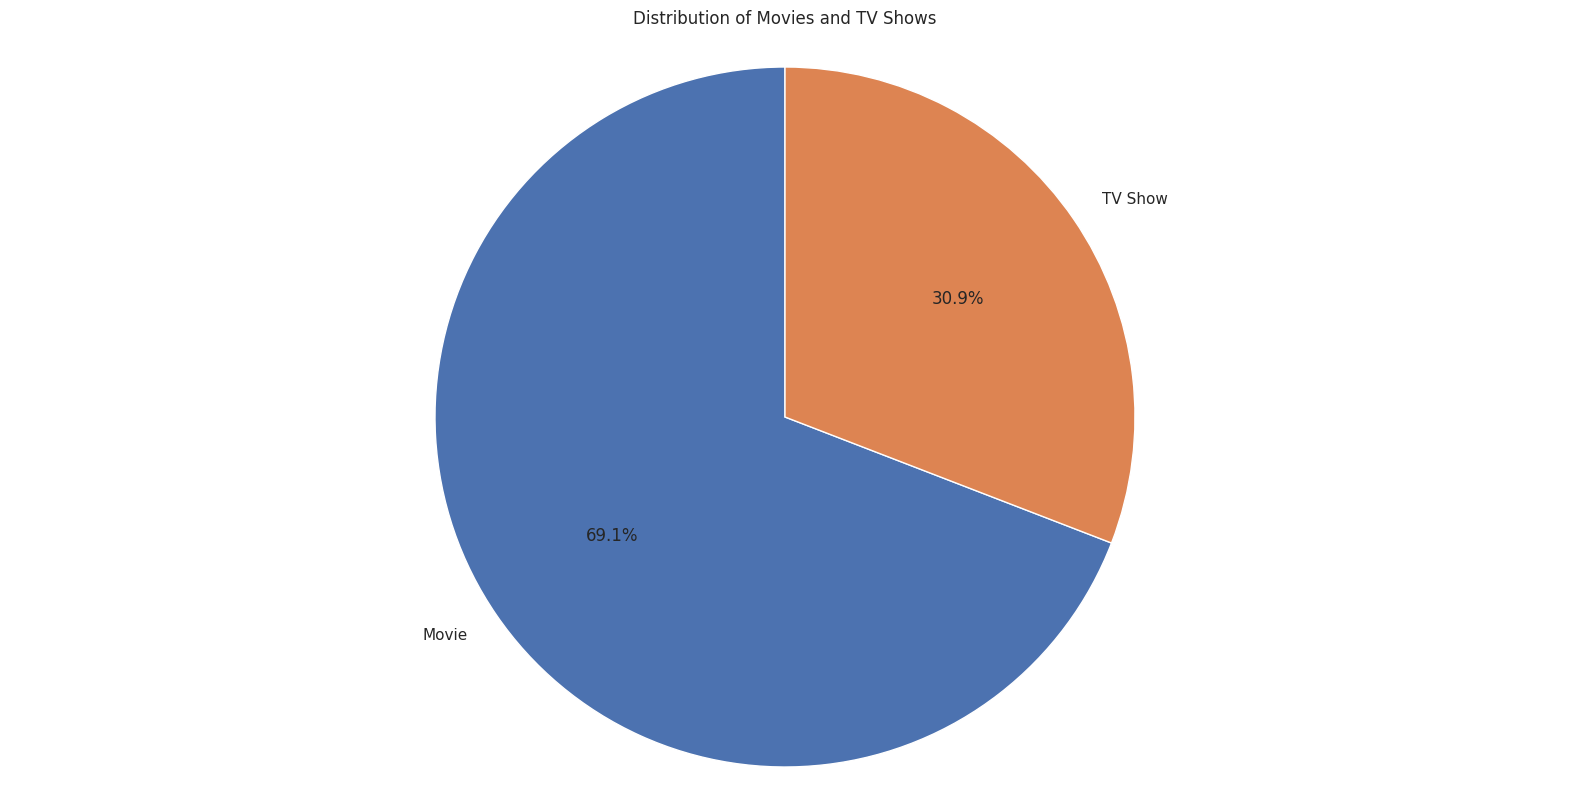

In [122]:
from matplotlib import pyplot as plt
import seaborn as sns

# Check the data type of the 'type' column
print(df['type'].dtype)

# Check the unique values and their counts in the 'type' column
print(df['type'].value_counts())

# Convert the plot to a pie chart
type_counts = df['type'].value_counts()
labels = type_counts.index
sizes = type_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Movies and TV Shows")
plt.axis('equal')
plt.show()


* On Netflix, there are 5,372 movies and 2,398 TV shows available. 

* TV shows account for 30.9% and movies account for 69.1% of the dataset

* This indicates that the number of movies on Netflix is higher than the number of TV shows, highlighting a greater quantity of movies compared to TV show content on the platform.


**2. Which category has highest ratings.**

In [18]:
df['rating']

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7770, dtype: object

In [19]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)

In [20]:
# type should be a categorical
df['type'] = pd.Categorical(df['type'])
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [21]:
df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,Older Kids


In [22]:
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

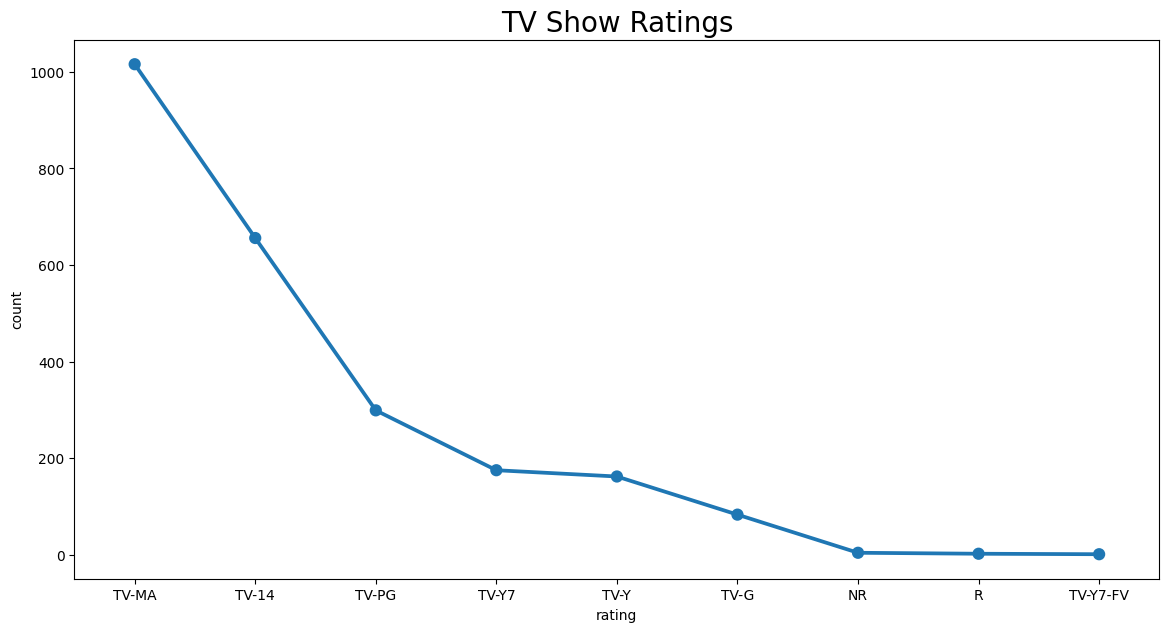

In [23]:
#Rating based on rating system of all TV Shows
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (14,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='20')
plt.show()

* For TV shows on Netflix, the TV-MA rating category has the highest number of ratings. TV-MA stands for "TV Mature Audience," indicating that the content is intended for adult audiences due to its mature themes, language, or content. This suggests that Netflix offers a significant amount of content targeted at adult viewers.

<Axes: title={'center': 'movie ratings'}, xlabel='rating', ylabel='count'>

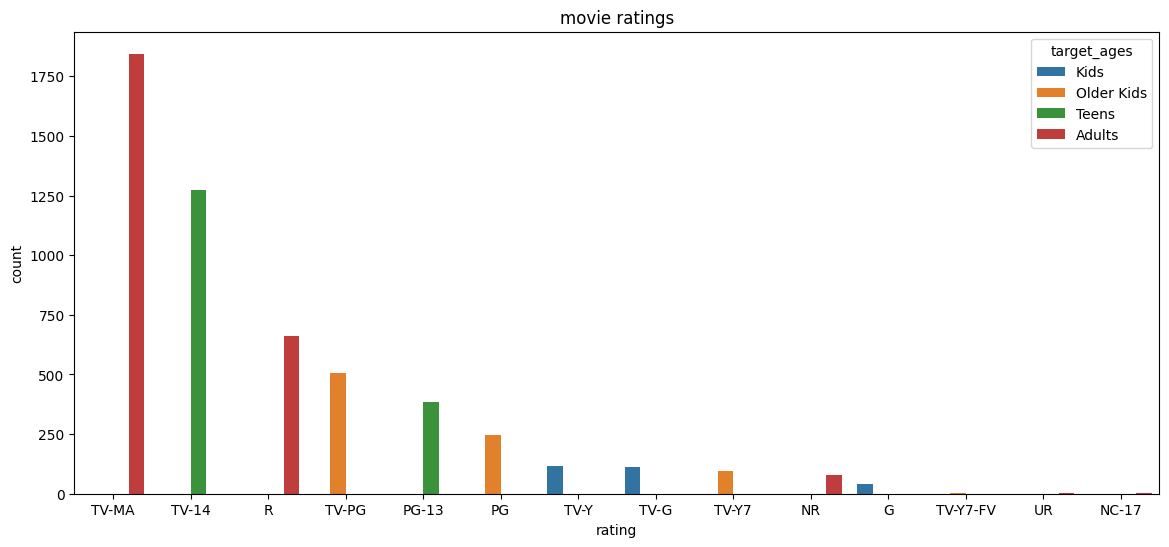

In [24]:
#Movie Ratings based on Target Age Groups
plt.figure(figsize=(14,6))
plt.title('movie ratings')
sns.countplot(x=movies['rating'],hue=movies['target_ages'],data=movies,order=movies['rating'].value_counts().index)

* In both cases, TV-MA has the highest number of ratings for TV shows, indicating that it is the rating category with the most content targeted at adult audiences. TV-MA is associated with mature themes, strong language, and explicit content, making it suitable for viewers who are 17 years or older. This observation suggests that Netflix offers a considerable amount of content catering to adult viewers.

**3. In which year maximum no. of Movies released.**

In [25]:
movies_year =movies['release_year'].value_counts().sort_index(ascending=False)

In [26]:
movies_year

2021     12
2020    411
2019    582
2018    734
2017    742
       ... 
1946      1
1945      3
1944      3
1943      3
1942      2
Name: release_year, Length: 72, dtype: int64

In [27]:
tvshows_year =tv_shows['release_year'].value_counts().sort_index(ascending=False)


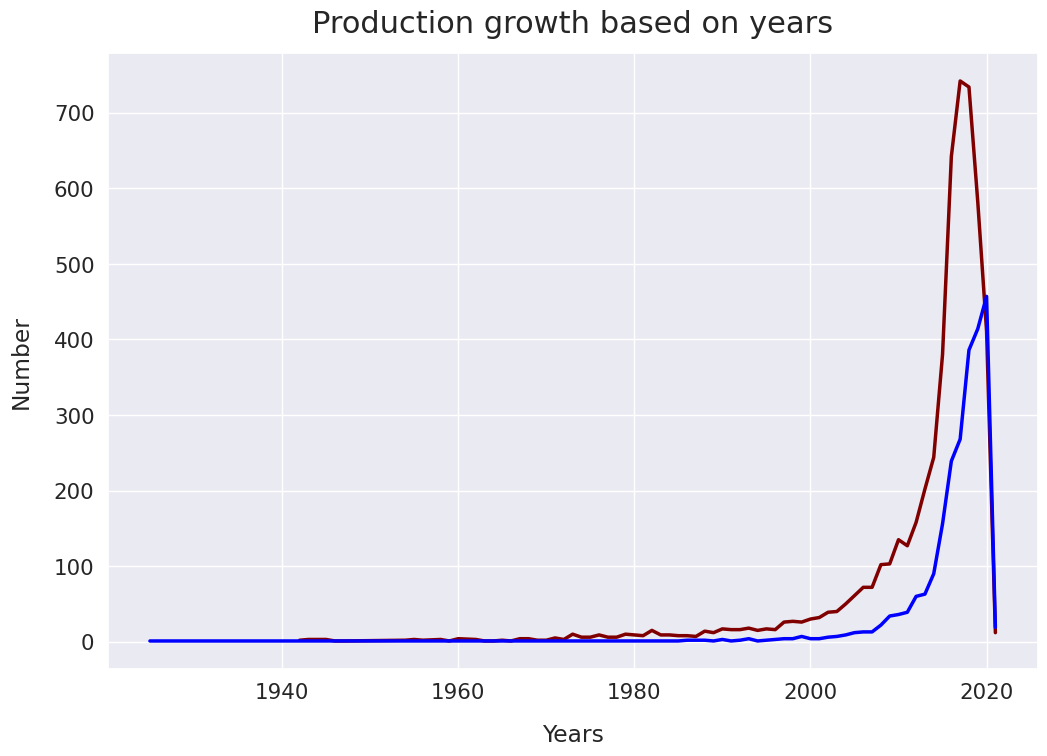

In [28]:
# visualizing the movies and tv_shows based on the release year
sns.set(font_scale=1.4)
movies_year.plot(figsize=(12, 8), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
tvshows_year.plot(figsize=(12, 8), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth based on years", y=1.02, fontsize=22);

<Axes: xlabel='count', ylabel='release_year'>

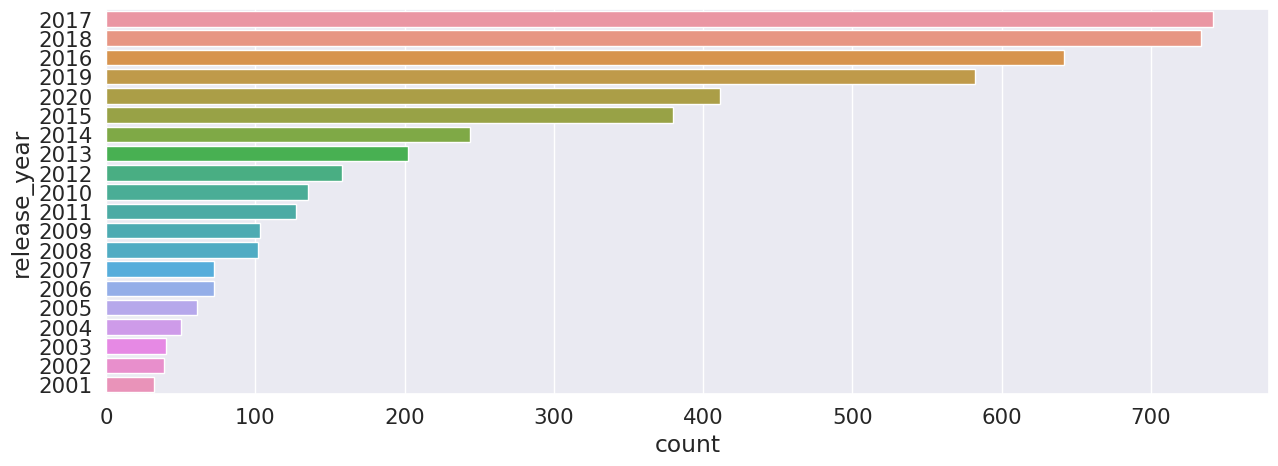

In [29]:
#Analysing how many movies are released every year in last 20 years
plt.figure(figsize=(15,5))
sns.countplot(y=movies['release_year'],data=df,order=movies['release_year'].value_counts().index[0:20])


* The highest number of movies was released in the years 2017 and 2018. These two years saw a significant influx of movies being added to the Netflix platform, indicating a robust release of new content during that period. The specific number of movies released in each year can be obtained from the dataset or further analysis.

In [30]:
tvshows_year

2021     19
2020    457
2019    414
2018    386
2017    268
2016    239
2015    156
2014     90
2013     63
2012     60
2011     39
2010     36
2009     34
2008     22
2007     13
2006     13
2005     12
2004      9
2003      7
2002      6
2001      4
2000      4
1999      7
1998      4
1997      4
1996      3
1995      2
1994      1
1993      4
1992      2
1991      1
1990      3
1989      1
1988      2
1986      2
1985      1
1981      1
1979      1
1977      1
1974      1
1972      1
1968      1
1967      1
1963      1
1946      1
1925      1
Name: release_year, dtype: int64

<Axes: xlabel='count', ylabel='release_year'>

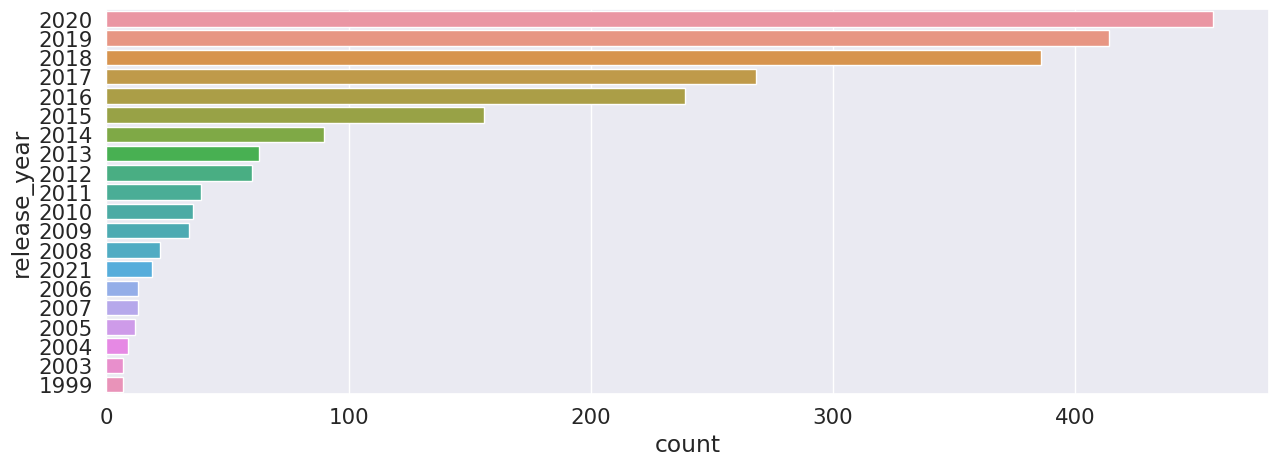

In [31]:
#Analysing how many movies are released every year in last 15 years
plt.figure(figsize=(15,5))
sns.countplot(y=tv_shows['release_year'],data=df,order=tv_shows['release_year'].value_counts().index[0:20])

* The years 2017 and 2018 witnessed a substantial release of movies, indicating a peak in new movie additions on the Netflix platform.

* The year 2020 saw the highest number of movie releases on Netflix, indicating a significant surge in new movie content during that year.

* The number of movies available on Netflix is growing at a much faster pace than the number of TV shows, suggesting a stronger emphasis on expanding the movie library.

* There has been a remarkable increase in the number of movies and television episodes on Netflix since 2015, showcasing a substantial growth in content offerings during that time.

* However, there has been a noticeable decline in the production of movies and television episodes after 2020, suggesting a decrease in the rate of new content being added to the platform.

* It appears that Netflix has placed a greater focus on increasing its movie content compared to TV shows, as the growth in the number of movies has outpaced that of TV shows in a more pronounced manner.

In [32]:
df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,Older Kids


In [33]:
#adding columns of month and year of addition
df['month'] = pd.DatetimeIndex(df['date_added']).month

In [34]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1


**4.In which month Maximum no. of movies released.**

12    832
10    785
1     756
11    738
3     668
9     618
8     617
7     600
4     600
5     543
6     542
2     471
Name: month, dtype: int64
int64


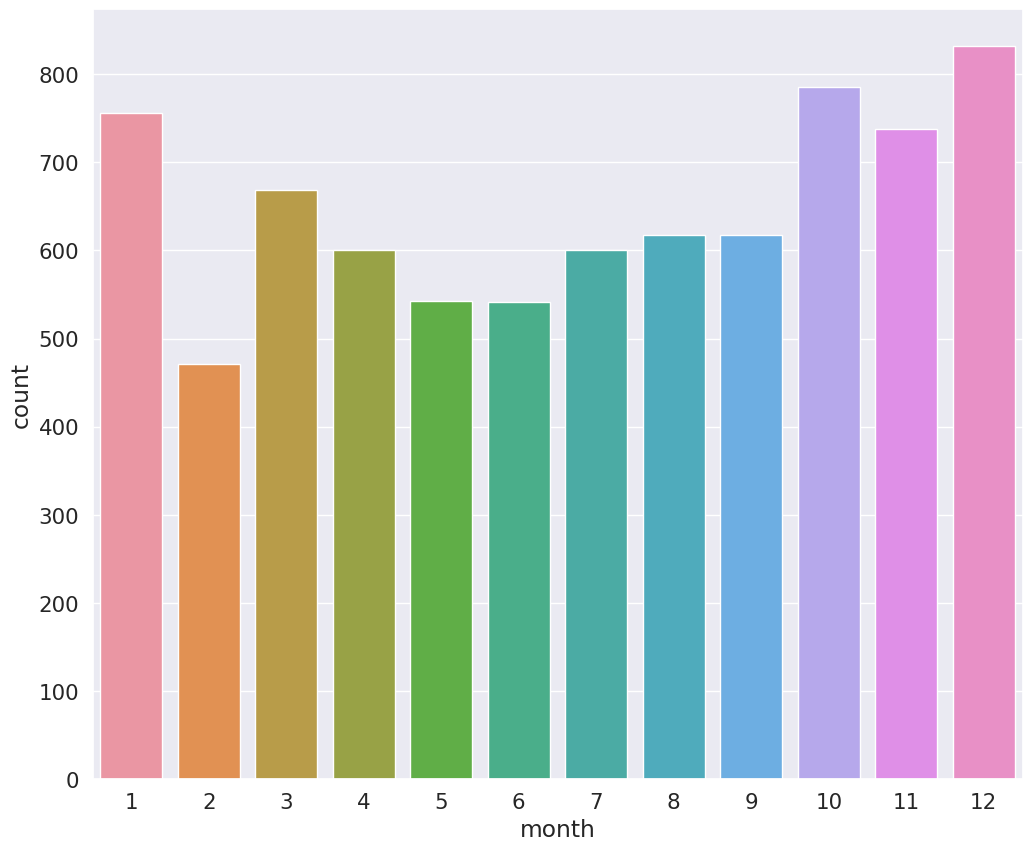

In [35]:
# Plotting the Countplot 

# Check the 'month' column in your DataFrame
print(df['month'].value_counts())
print(df['month'].dtype)

# If the 'month' column contains unexpected values or missing values, handle them
# For example:
# df['month'].fillna('Unknown', inplace=True)
# df['month'].replace({'incorrect_value': 'correct_value'}, inplace=True)

# Plotting the Countplot
plt.figure(figsize=(12, 10))
ax = sns.countplot(x='month', data=df)
plt.show()


* The period from October to January experienced the highest influx of new movies and TV shows being added to the Netflix platform. During these months, there was a notable increase in the number of content additions, indicating a peak in new releases and updates to the streaming service's library. This timeframe is likely associated with the holiday season and colder months when people tend to spend more time indoors and engage in streaming entertainment.

<Axes: xlabel='month', ylabel='count'>

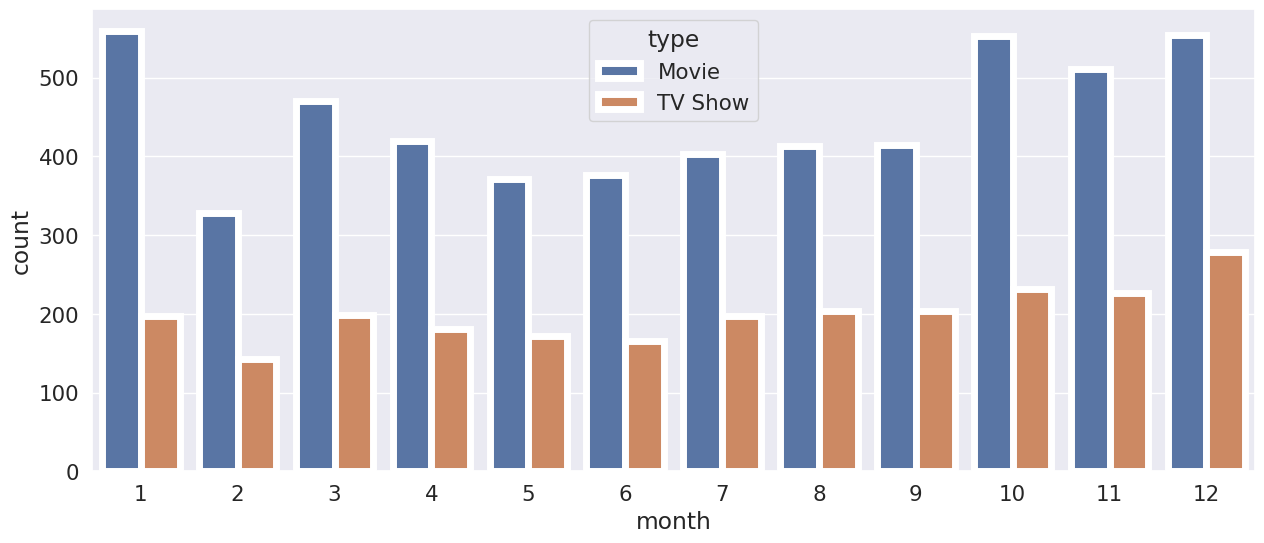

In [36]:
fig, ax = plt.subplots(figsize=(15,6))

sns.countplot(x='month', hue='type',lw=5, data=df, ax=ax)


* Based on the provided graph, it is evident that the highest amount of content is added to Netflix between the months of October and January. During this period, there is a significant spike in the number of additions, indicating a concentrated period of content updates and releases on the platform. This trend suggests that Netflix strategically focuses on introducing new movies and TV shows during the end-of-year holiday season and the beginning of the new year, potentially to cater to increased viewer demand during these months.

**5. Which genre is more popular.**

<Axes: title={'center': 'Top10 Genre of Movies'}, xlabel='count', ylabel='listed_in'>

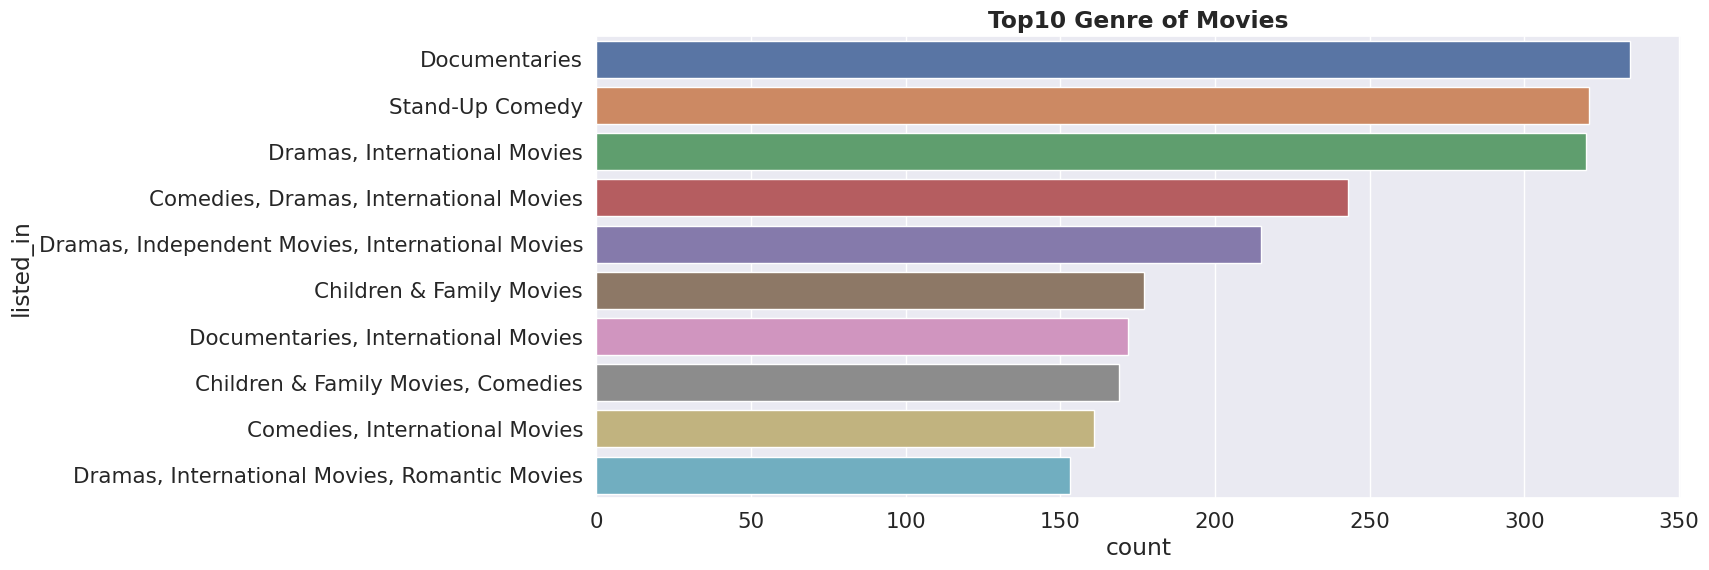

In [37]:
#Analysing top10 genre of the movies
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of Movies',fontweight="bold")
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10])

* According to the data, documentaries are the most prominent genre on Netflix, followed by stand-up comedy, dramas, and international movies. Documentaries likely hold a significant position due to their educational and informative nature, appealing to a wide range of viewers. Stand-up comedy, known for its entertaining and comedic performances, is also highly popular. Dramas, with their compelling narratives and emotional depth, attract a substantial audience. Additionally, the inclusion of international movies highlights the global appeal and diverse content available on Netflix, catering to viewers' preferences from various regions and cultures.

<Axes: title={'center': 'Top10 Genre of TV Shows'}, xlabel='count', ylabel='listed_in'>

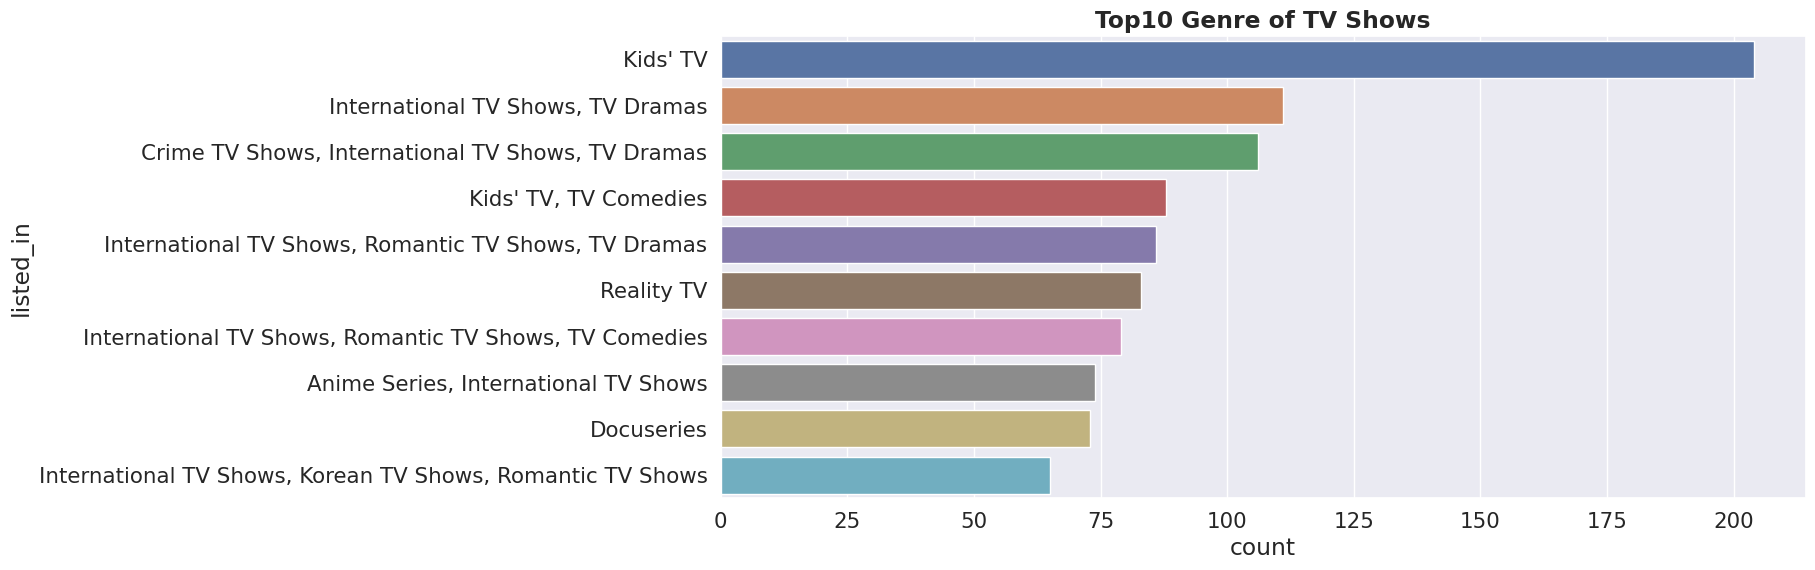

In [38]:
#Analysing top10 genres of TV Shows
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of TV Shows',fontweight="bold")
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10])

* According to the information provided, the top genre for TV shows on Netflix is "Kids TV." This genre specifically caters to children and offers age-appropriate content that is entertaining and educational for young viewers. The popularity of kids' TV shows on Netflix reflects the platform's efforts to provide a diverse range of programming for different audience segments, including children and families. By offering a variety of kids' TV shows, Netflix aims to meet the entertainment needs of young viewers and provide a safe and enjoyable streaming experience for families.


**6.Which Season has the maximum duration.**

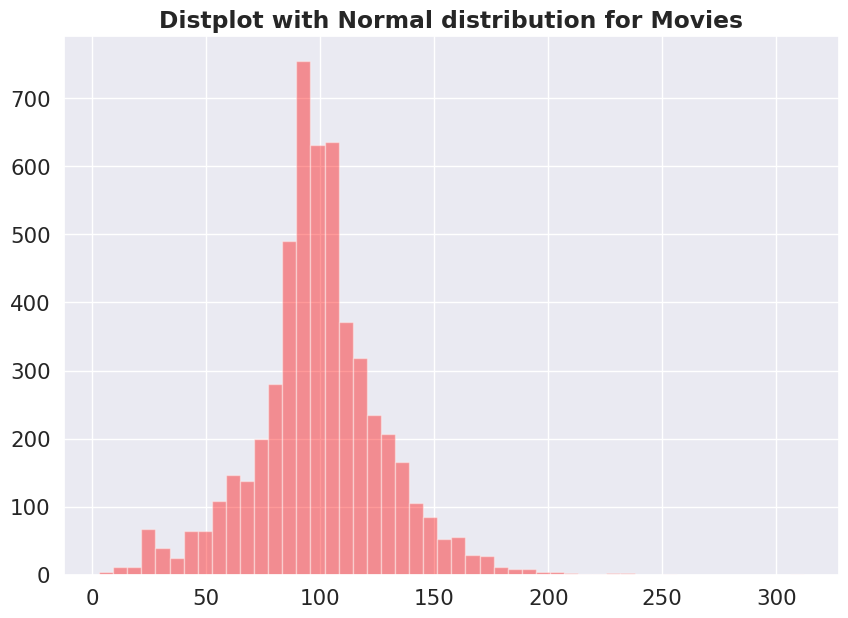

In [39]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.distplot(movies['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

* A significant portion of movies on Netflix has a duration ranging from 50 minutes to 150 minutes. This duration range suggests that the majority of movies available on the platform fall within a standard feature film length. Movies within this duration range are likely to provide a complete and engaging storytelling experience within a reasonable time frame. It indicates that Netflix offers a diverse selection of movies that cater to various preferences and viewing preferences, ensuring there are options available for shorter and longer viewing sessions.

<Axes: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

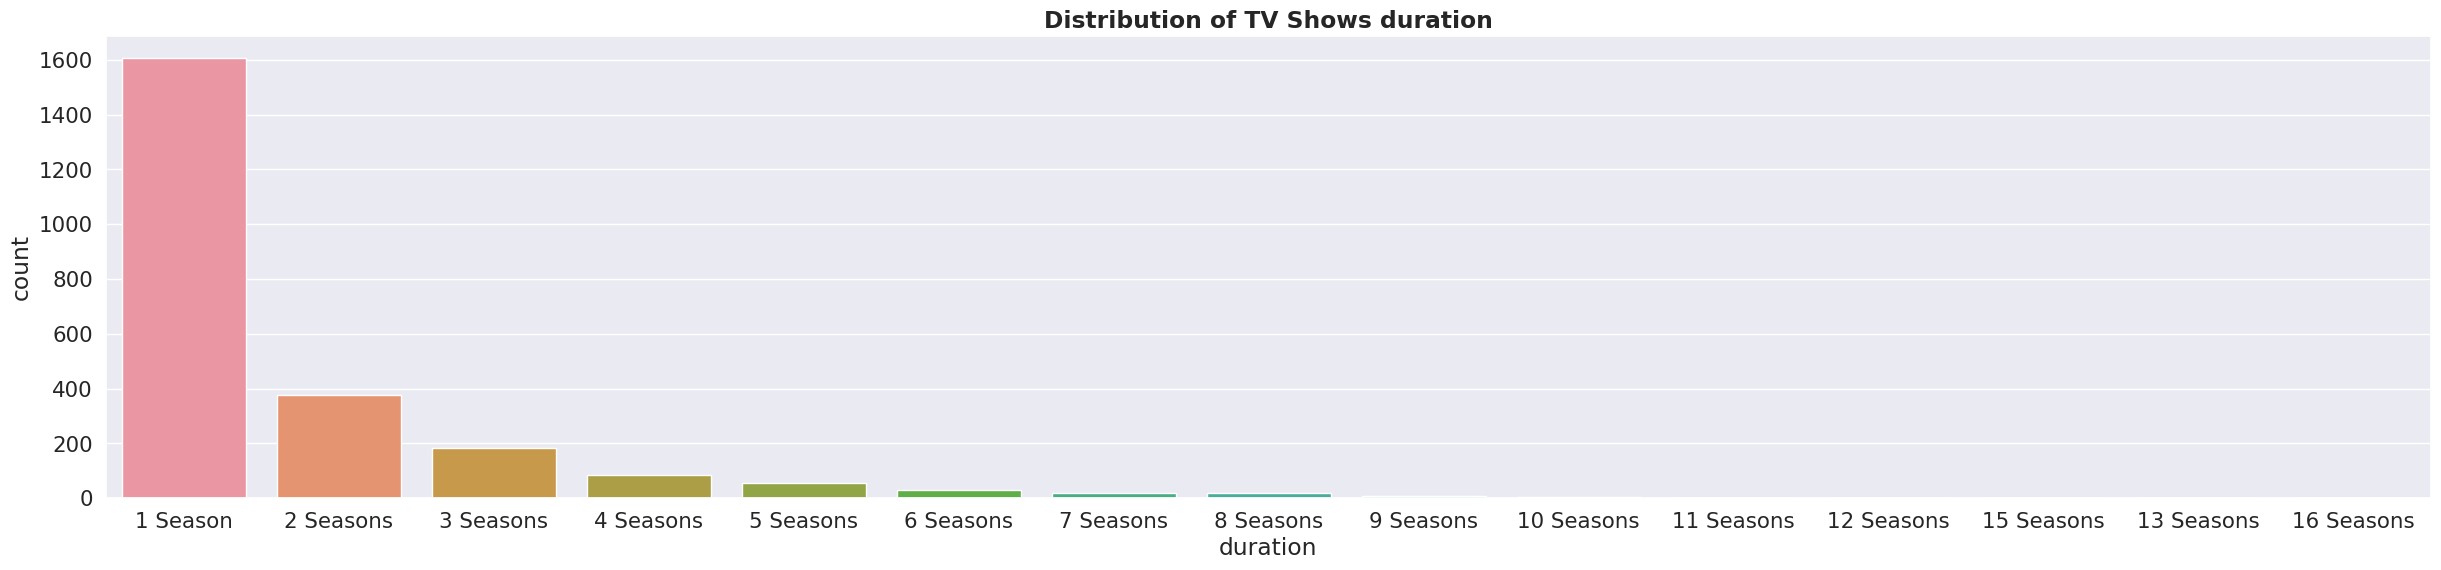

In [40]:
#Checking the distribution of TV Shows
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)

* The highest number of TV shows on Netflix consists of a single season. This indicates that there is a significant portion of TV shows available on the platform that were either intended to be a limited series or were discontinued after a single season. These TV shows might offer a concise and self-contained narrative within a single season, providing viewers with a complete story arc. It also suggests that Netflix offers a diverse range of TV shows, including both long-running series and shorter, self-contained ones, catering to different viewer preferences and providing a variety of content options.

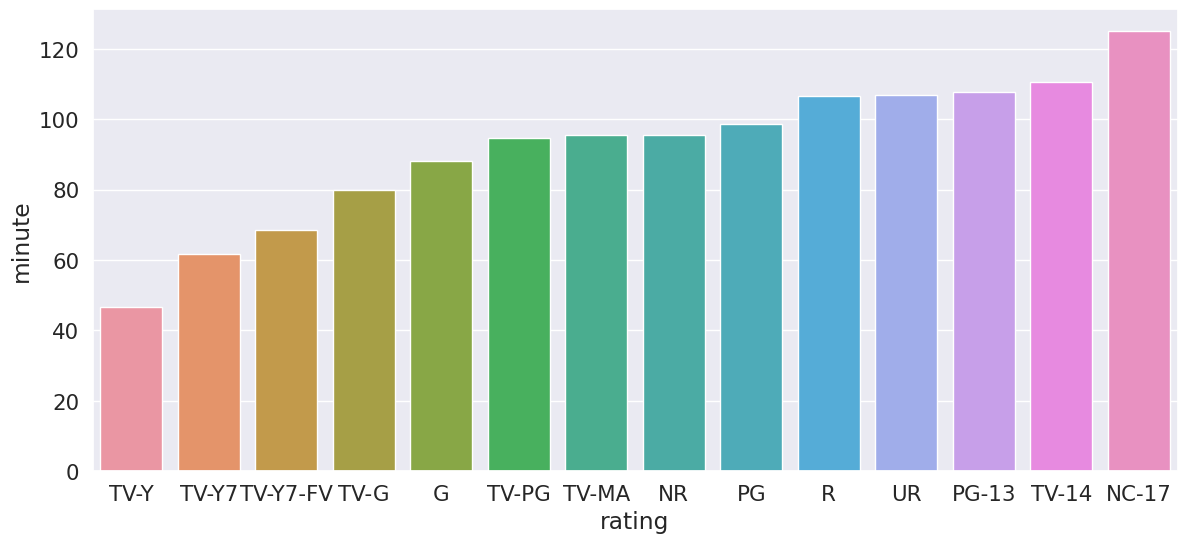

In [41]:
movies['minute'] = movies['duration'].str.extract('(\d+)').apply(pd.to_numeric)
duration_year = movies.groupby(['rating'])['minute'].mean()
duration_df=pd.DataFrame(duration_year).sort_values('minute')
plt.figure(figsize=(14,6))
ax=sns.barplot(x=duration_df.index, y=duration_df.minute)

* Movies with an NC-17 rating tend to have the longest average duration among all rating categories. The NC-17 rating signifies that the content is intended for mature audiences only, usually due to explicit or graphic content. These movies often explore adult themes and can have extended runtimes to accommodate complex storytelling or explicit scenes.

* On the other hand, movies with a TV-Y rating, which is intended for young children, have the shortest average runtime. TV-Y-rated movies are typically designed to be age-appropriate and suitable for all audiences, including young viewers. As a result, they often have shorter runtimes to match the attention span and viewing preferences of young children.

* These observations highlight the correlation between content rating and movie duration, with more mature content often being associated with longer runtimes, while movies for younger audiences tend to be shorter to cater to their needs and engagement levels.

**7. Which country has the maximum no. of content on Netflix.**

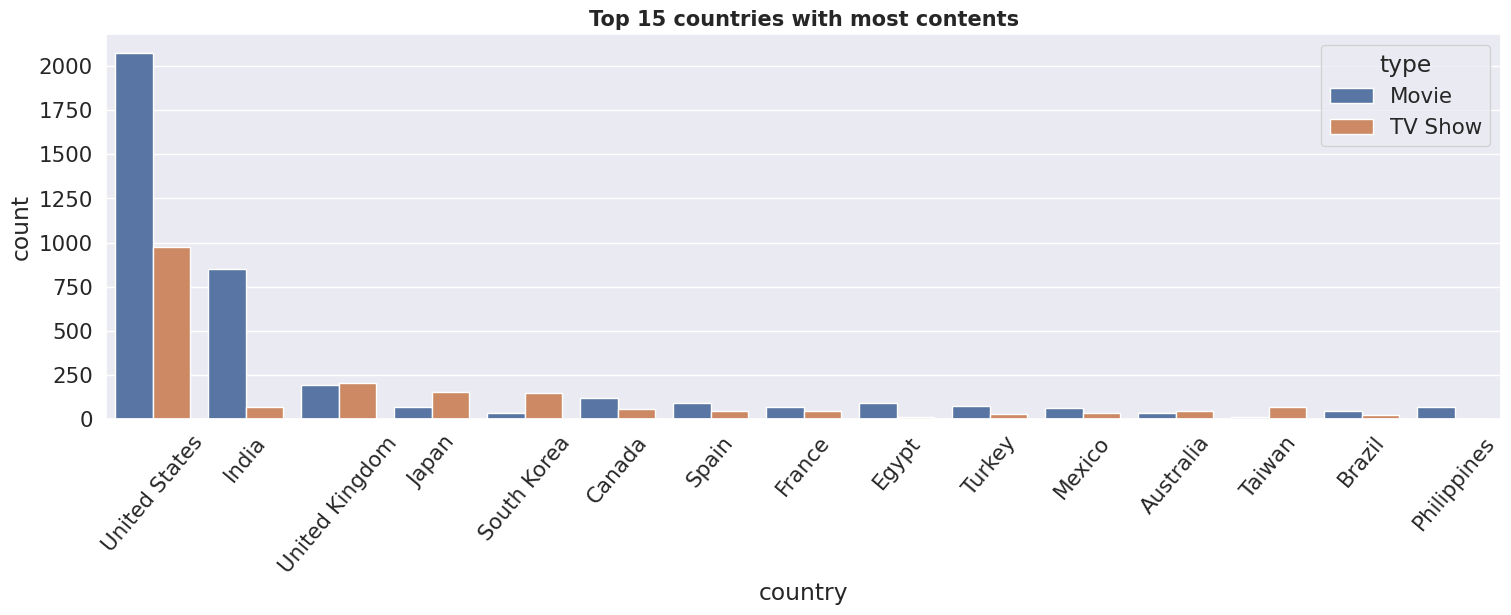

In [42]:
#Analysing top15 countries with most content 
plt.figure(figsize=(18,5))
sns.countplot(x=df['country'],order=df['country'].value_counts().index[0:15],hue=df['type'])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

* The United States has the highest number of content available on Netflix, followed by India. This indicates that the Netflix library offers a significant amount of content targeted at viewers in these two countries. The United States, being the home country of Netflix, has a diverse range of movies and TV shows available on the platform. India, with its large population and growing market for streaming services, has also emerged as a significant contributor to the Netflix content library. The presence of a substantial amount of content from both the United States and India suggests that Netflix aims to cater to the preferences and interests of viewers in these key markets.

In [43]:
#top_two countries where netflix is most popular
country=df['country'].value_counts().reset_index()
country

,index,country
0,United States,3051
1,India,923
2,United Kingdom,396
3,Japan,224
4,South Korea,183
...,...,...
676,"Russia, United States, China",1
677,"Italy, Switzerland, France, Germany",1
678,"United States, United Kingdom, Canada",1
679,"United States, United Kingdom, Japan",1


<BarContainer object of 11 artists>

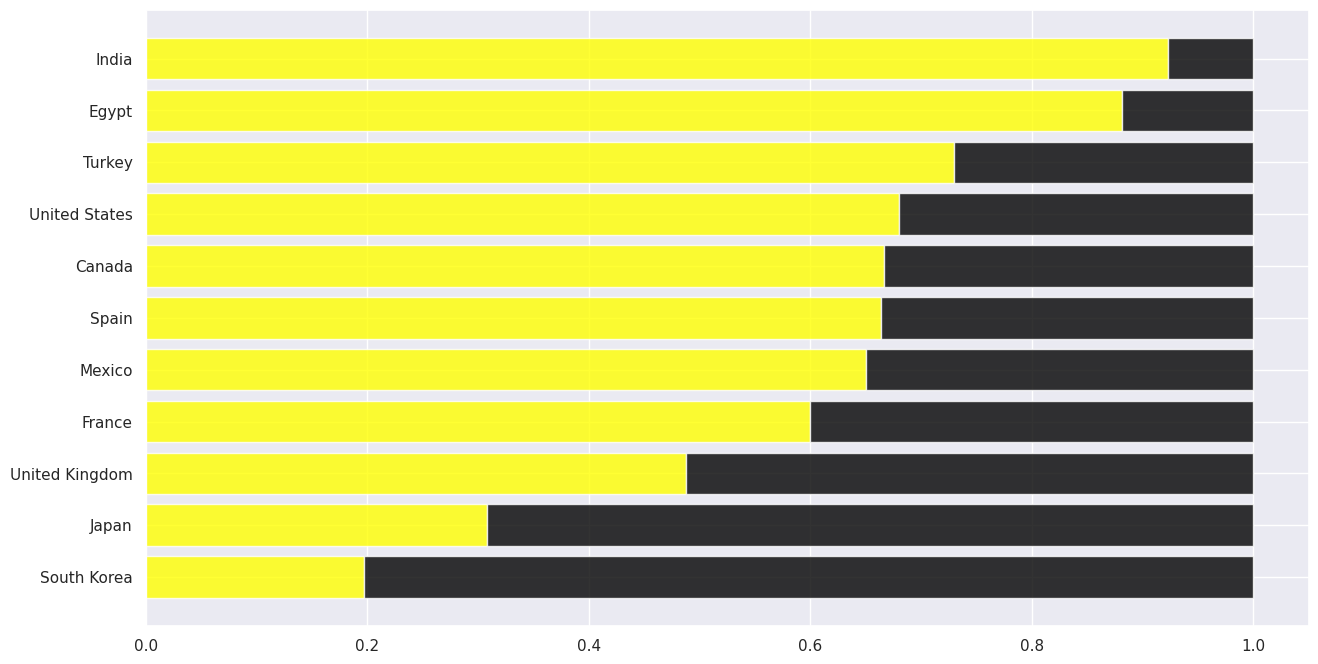

In [96]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = df['country'].value_counts()[:11].index
content_data = df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'], 
        color='yellow', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'], 
        color='black', alpha=0.8, label='TV Show')

* India has the highest number of movies available on Netflix. This indicates that the Netflix library includes a significant collection of movies specifically targeted towards Indian viewers. Given the popularity of Indian cinema and the large film industry in India, it is not surprising to see a substantial number of Indian movies featured on the platform. This diverse selection of Indian movies allows Netflix to cater to the preferences and interests of its Indian audience and provides them with a wide range of choices from the Indian film industry.





In [45]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Kids,0.180791,0.000000,0.095652,0.016251,0.008929,0.02,0.027322,0.022388,0.093434,0.089479
Older Kids,0.225989,0.039604,0.060870,0.160347,0.272321,0.07,0.120219,0.044776,0.204545,0.195346
Teens,0.146893,0.683168,0.165217,0.567714,0.352679,0.14,0.382514,0.097015,0.189394,0.243199
Adults,0.446328,0.277228,0.678261,0.255688,0.366071,0.77,0.469945,0.835821,0.512626,0.471976


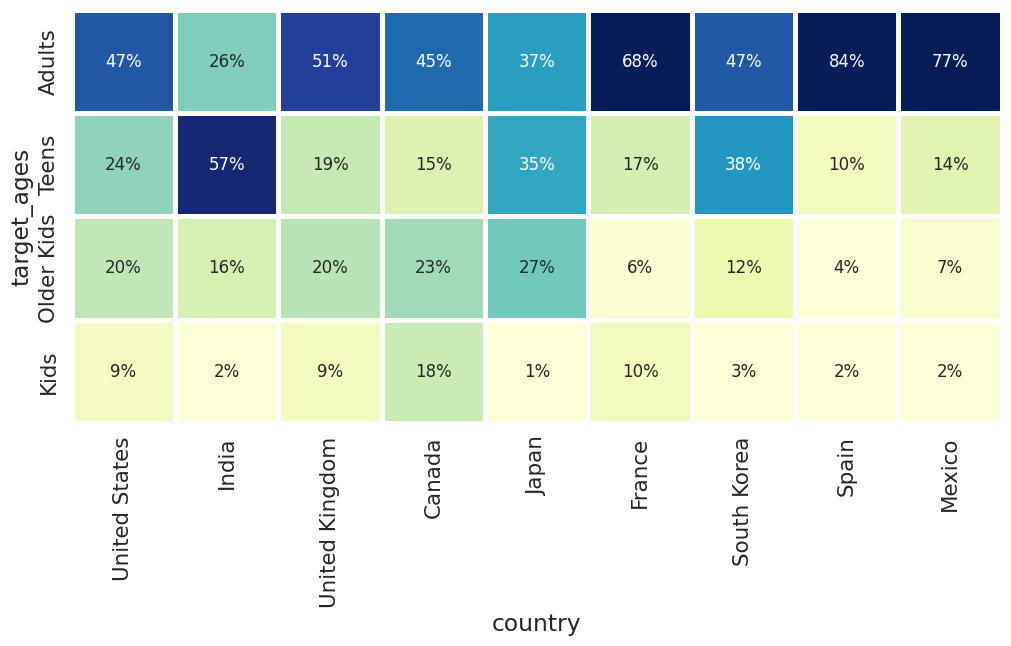

In [46]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()


* The target age demographics for Netflix in the US and UK are closely aligned, indicating that the content offered by the platform caters to similar age groups in these countries. However, when compared to countries like India or Japan, the target age demographics differ significantly. This suggests that the content preferences and interests of viewers in India or Japan may vary significantly from those in the US and UK. Netflix likely tailors its content selection and recommendations to cater to the specific preferences and cultural nuances of each country.

* On the other hand, Mexico and Spain have similar content on Netflix, but for different age groups. This implies that while the content offered in these countries may align in terms of themes, genres, or overall style, the target age demographics within each country differ. Netflix recognizes the varying preferences of viewers within different regions and strives to provide tailored content that appeals to specific age groups in each market.

* These observations highlight how Netflix adapts its content strategy to cater to the preferences and cultural nuances of different countries and their respective target age demographics.

**8. Count of Netflix Originals**

In [47]:
df['date_added'] = pd.to_datetime(df['date_added'])
movies['year_added'] = df['date_added'].dt.year
df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults,10,1
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens,3,1
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults,9,1
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,Older Kids,10,1


* Some movies and TV shows on Netflix were originally released outside of the platform and were later added to the Netflix library. These titles are not considered Netflix Originals. They include content from various production studios and television networks that have distribution deals with Netflix.

* On the other hand, Netflix Originals refer to movies and TV shows that are produced or co-produced by Netflix itself. These titles are exclusively created for the platform and are not available on any other streaming service or traditional television networks. Netflix Originals encompass a wide range of genres and include both original movies and series that are developed and produced by Netflix's own production teams.

* By producing original content, Netflix aims to offer unique and exclusive programming to its subscribers, distinguishing itself from other streaming platforms and traditional television networks. Netflix Originals have gained significant popularity and critical acclaim, contributing to the platform's success in attracting and retaining subscribers.

([<matplotlib.patches.Wedge at 0x7f51bbc6add0>,
 [Text(-0.8900699117813855, -0.6463555926434588, 'Others'),
  Text(0.9709853583069661, 0.7051151919746822, 'Originals')],
 [Text(-0.48549267915348293, -0.3525575959873411, '69.99%'),
  Text(0.5664081256790635, 0.4113171953185646, '30.01%')])

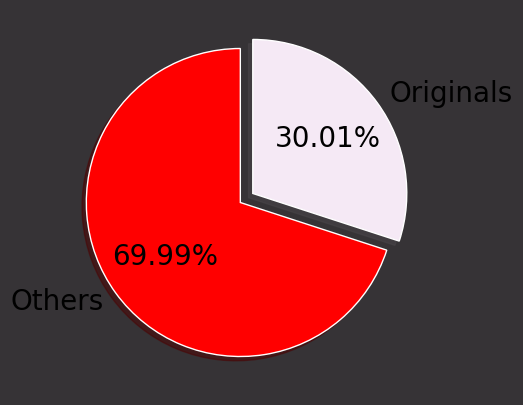

In [48]:
movies['originals'] = np.where(movies['release_year'] == movies['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5),facecolor="#363336")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])

* Based on the given information, approximately 30% of the movies available on Netflix were originally released on the platform itself. These movies are categorized as Netflix Originals, indicating that they were produced or co-produced by Netflix and premiered exclusively on the platform.

* On the other hand, about 70% of the movies added to Netflix were previously released through different modes, such as theatrical releases, DVD releases, or releases on other streaming services or television networks. These movies were later acquired by Netflix and made available to their subscribers.

* This mix of content on Netflix, with a significant portion being movies released through traditional channels and a substantial percentage being Netflix Originals, allows the platform to offer a diverse range of movies to its audience. It enables them to enjoy both exclusive content created by Netflix and popular movies from various sources that have been curated and added to the Netflix library.

# **Hypothesis**

# **1.Hypothesis Testing**
*   HO:The hypothesis being tested is that movies rated for kids and older kids on Netflix have a duration of equal to or more than two hours.
*   H1:The hypothesis being tested is that movies rated for kids and older kids on Netflix have a duration of less than two hours.

In [49]:
movies

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,minute,year_added,originals
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,93,2016,Yes
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,78,2018,No
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,80,2017,No
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,123,2020,No
6,s7,Movie,122,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",Adults,95,2020,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Older Kids,88,2020,No
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults,99,2020,No
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens,111,2019,No
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults,44,2020,No


In [50]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1,1


In [51]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [52]:
#with respect to each ratings assigning it into group of categories                 
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_hypothesis['target_ages'] = df_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages 
df_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [53]:
#Another category is target_ages (4 classes).
df_hypothesis['target_ages'] = pd.Categorical(df_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,1


In [54]:
#group_by duration and target_ages                 
group_by_= df_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,target_ages,duration
0,Kids,66.486891
1,Older Kids,92.024648
2,Teens,110.025332
3,Adults,98.275145


In [55]:
#In A and B variable grouping values 
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [56]:
#import stats 
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


In [57]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [58]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

* The null hypothesis stating that movies rated for kids and older kids on Netflix are at least two hours long is rejected based on the t-value falling outside the specified range. Therefore, it can be concluded that movies targeted for kids and older kids on Netflix have a duration that is less than two hours.

# **2. Hypothesis Testing** 
*    H1:The hypothesis being tested is that movies on Netflix have a duration of more than 90 minutes.
*   HO:The hypothesis being tested is that there are no movies on Netflix with a duration of more than 90 minutes.


In [59]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1,1


In [60]:
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_

In [61]:
df_hypothesis['type'] = pd.Categorical(df_hypothesis['type'], categories=['Movie','TV Show'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
#df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
#df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1


In [62]:
#group_by duration and TYPE                 
group_by_= df_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,type,duration
0,Movie,99.330417
1,TV Show,1.761468


In [63]:
#In A and B variable grouping values 
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  duration    99.330417
dtype: float64
Std  duration    1.561099
dtype: float64


In [64]:
#import stats 
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

5372 2398
dof 7768
SP_2 = duration    252.749896
dtype: float64
SP duration    15.89811
dtype: float64
tvalue 249.88962005047787


In [65]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9602694215408423

In [66]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9602694215408418

* Because the t-value falls outside the specified range, the null hypothesis is rejected. This indicates that movies rated for kids and older kids on Netflix do have a duration of more than 90 minutes. Therefore, it can be concluded that movies with a duration exceeding 90 minutes are indeed categorized as movies rather than other types of content on Netflix.

# Feature engineering

In [67]:
df.dtypes

show_id                 object
type                  category
title                   object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
target_ages           category
month                    int64
count                    int64
dtype: object

In [68]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [69]:
df.dtypes

show_id                 object
type                  category
title                   object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
target_ages           category
month                    int64
count                    int64
dtype: object

In [70]:
df['description'].astype(str)

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: description, Length: 7770, dtype: object

In [71]:
# after above all the changes, those features are in list format, so making list of description feature
df['description'] = df['description'].apply(lambda x: x.split(' '))

In [72]:
# converting text feature to string from list
df['description']= df['description'].apply(lambda x: " ".join(x))
# making all the words in text feature to lowercase
df['description']= df['description'].apply(lambda x: x.lower())

In [73]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
# applying above function on text feature
df['description']= df['description'].apply(remove_punctuation)

In [74]:
df['description'][0:10]

0    in a future where the elite inhabit an island ...
1    after a devastating earthquake hits mexico cit...
2    when an army recruit is found dead his fellow ...
3    in a postapocalyptic world ragdoll robots hide...
4    a brilliant group of students become cardcount...
5    a genetics professor experiments with a treatm...
6    after an awful accident a couple admitted to a...
7    after one of his high school students attacks ...
8    when a doctor goes missing his psychiatrist wi...
9    an architect and his wife move into a castle t...
Name: description, dtype: object

In [75]:
# using nltk library to download stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
sw=stopwords.words('english')
#Defining stopwords 
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)
# applying above function on text feature
df['description']=df['description'].apply(stopwords)
# this is how value in text looks like after removing stopwords
df['description'][0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

In [76]:
# importing TfidVectorizer from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

In [77]:
#Applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(df['description'])
X_tfidf.shape

(7770, 5000)

In [78]:
# convert X into array form for clustering
X = X_tfidf.toarray() 

# **Clustering algorithms**

# **1.Kmean**

# **Finding the optimal number of clusters using the elbow method**

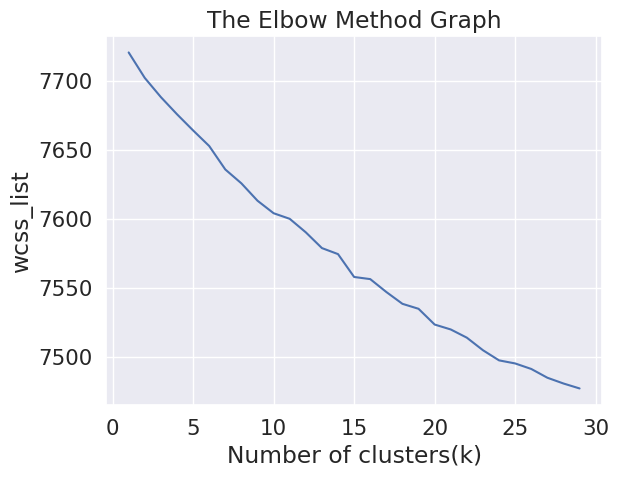

In [79]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 30.  
for i in range(1, 30):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 30), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [80]:
from sklearn.metrics import silhouette_score
#sillhoute score of clusters 
sill = [] 
for i in range(2,30):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(X)
    y1 = model.predict(X)
    score = silhouette_score(X,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

cluster: 2 	 Sillhoute: 0.0014
cluster: 3 	 Sillhoute: 0.0016
cluster: 4 	 Sillhoute: 0.0021
cluster: 5 	 Sillhoute: 0.0025
cluster: 6 	 Sillhoute: 0.0034
cluster: 7 	 Sillhoute: 0.0037
cluster: 8 	 Sillhoute: 0.0038
cluster: 9 	 Sillhoute: 0.0042
cluster: 10 	 Sillhoute: 0.0045
cluster: 11 	 Sillhoute: 0.0046
cluster: 12 	 Sillhoute: 0.0048
cluster: 13 	 Sillhoute: 0.0051
cluster: 14 	 Sillhoute: 0.0056
cluster: 15 	 Sillhoute: 0.0061
cluster: 16 	 Sillhoute: 0.0063
cluster: 17 	 Sillhoute: 0.0064
cluster: 18 	 Sillhoute: 0.0062
cluster: 19 	 Sillhoute: 0.0063
cluster: 20 	 Sillhoute: 0.0069
cluster: 21 	 Sillhoute: 0.0067
cluster: 22 	 Sillhoute: 0.0069
cluster: 23 	 Sillhoute: 0.0068
cluster: 24 	 Sillhoute: 0.0072
cluster: 25 	 Sillhoute: 0.0073
cluster: 26 	 Sillhoute: 0.0071
cluster: 27 	 Sillhoute: 0.0074
cluster: 28 	 Sillhoute: 0.0074
cluster: 29 	 Sillhoute: 0.0072


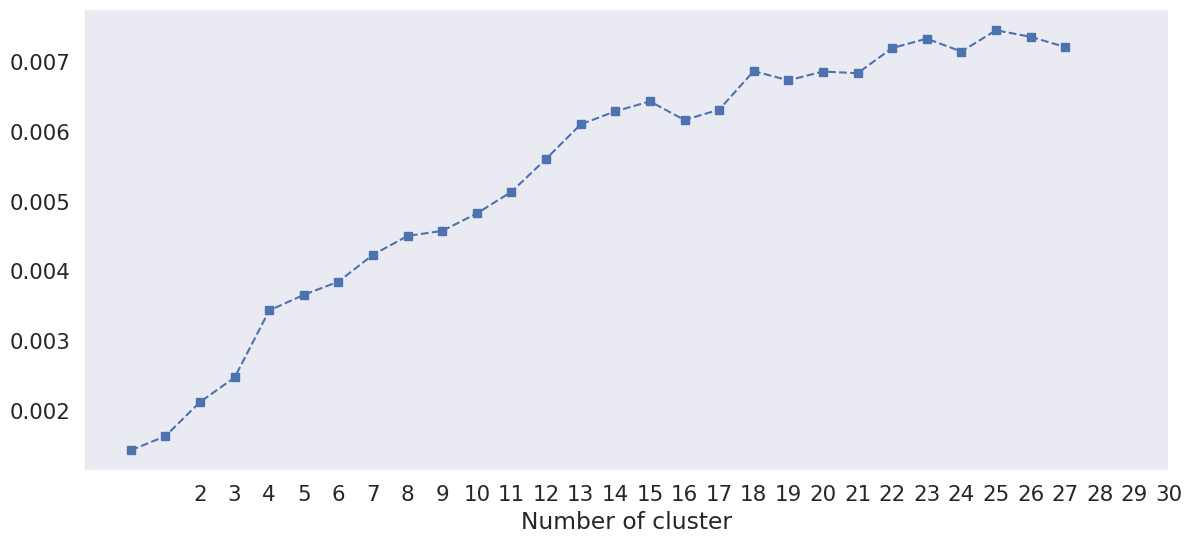

In [81]:
#Plotting Sillhoute's score
plt.figure(figsize=(14, 6))  # Set the figsize to adjust the width and height of the plot
plt.plot(sill, 'bs--')
plt.xticks(list(range(2, 31)), list(range(2, 31)))  # Adjusted range for tick labels
plt.grid()
plt.xlabel('Number of cluster')
plt.show()


* Based on the elbow method and silhouette score analysis, it is suggested to form 26 clusters for the given dataset. The elbow method helps determine the optimal number of clusters by evaluating the distortion or inertia, while the silhouette score measures the quality and separation of the clusters. Both methods indicate that 26 clusters would be appropriate for the dataset based on the available information.italicized text

In [82]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters= 26, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X) 

# **Evaluation**

In [83]:
#Predict the clusters and evaluate the silhouette score

score = silhouette_score(X, y_predict)
print("Silhouette score is {}".format(score))

Silhouette score is 0.007218341785521539


In [84]:
#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_predict)

9.193799997853855

In [85]:
#Adding a seperate column for the cluster
df["cluster"] = y_predict

In [86]:
df['cluster'].value_counts().sort_index()

0      155
1      271
2      532
3     2504
4      158
5      319
6       72
7      268
8      205
9      138
10     224
11     331
12     232
13      79
14     284
15     189
16     209
17     223
18     289
19     192
20     108
21     175
22     140
23     234
24     150
25      89
Name: cluster, dtype: int64

<Axes: xlabel='cluster', ylabel='count'>

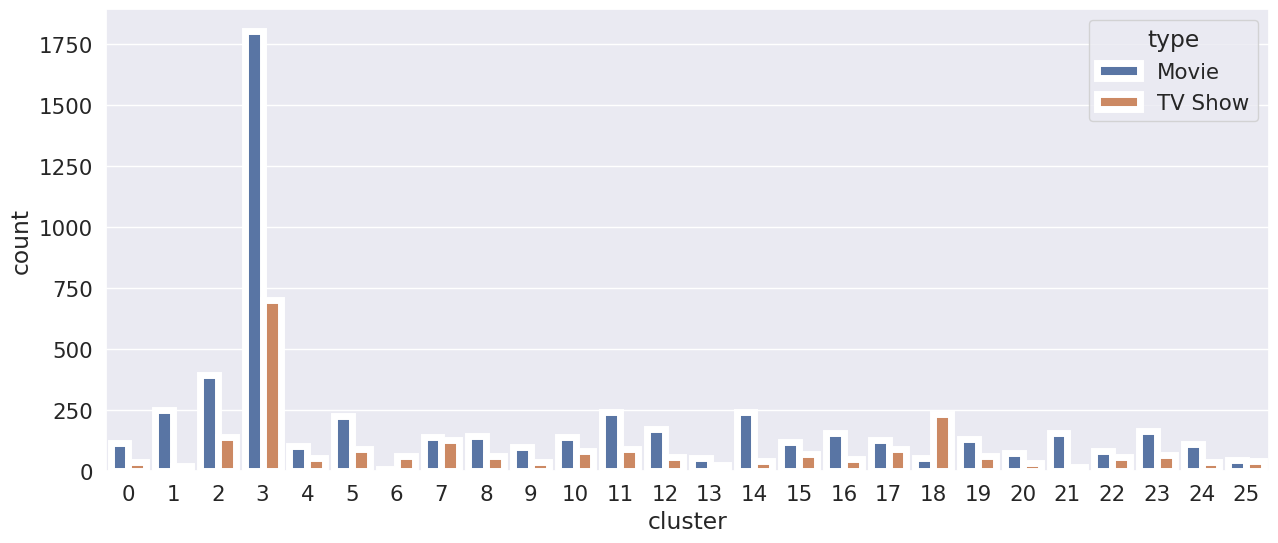

In [87]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='cluster', hue='type',lw=5, data=df, ax=ax)

* Based on the analysis, it has been observed that cluster 3 contains the highest number of data points compared to other clusters. This indicates that a significant portion of the dataset belongs to cluster 3, suggesting that there are certain characteristics or patterns shared among these data points that differentiate them from the rest of the clusters. Further exploration of cluster 3 may provide valuable insights into the specific attributes or behaviors of the data points within that cluster.

In [88]:
#SCATTER PLOT FOR CLUSTERS
fig = px.scatter(df, y="description", x="cluster",color="cluster")
fig.update_traces(marker_size=100)
fig.show()

# **Dendogram**

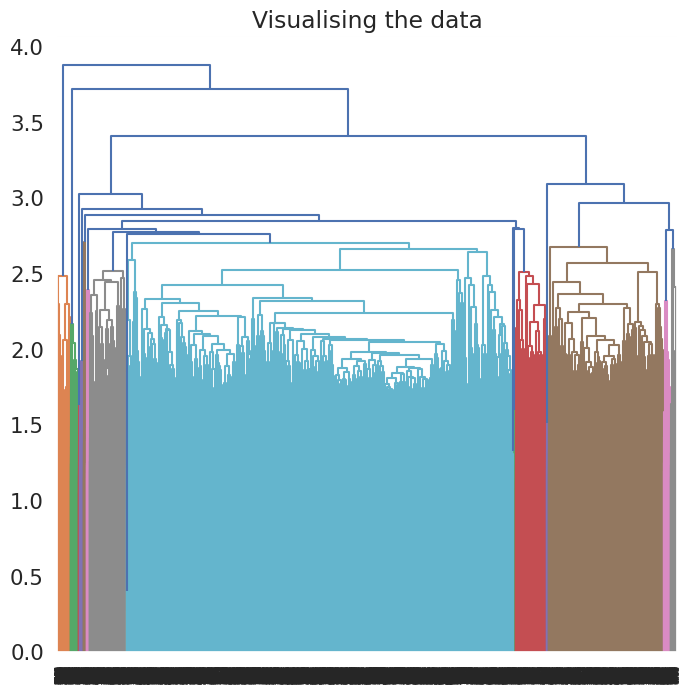

In [89]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

# **2. Agglomerative Clustering**

In [90]:
#Fitting our variable in Agglomerative Clusters
from sklearn.cluster import AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
aggh.fit(X)
#Predicting using our model
y_hc=aggh.fit_predict(X)

In [91]:
df_hierarchical =df.copy()
#creating a column where each row is assigned to their separate cluster
df_hierarchical['cluster'] = aggh.labels_
df_hierarchical.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count,cluster
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,Adults,8,1,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,Adults,12,1,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,Adults,12,1,0
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,Teens,11,1,1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,brilliant group students become cardcounting e...,Teens,1,1,0


# **Evaluation**

In [92]:
#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X,y_hc, metric='euclidean'))

Silhouette Coefficient: -0.002


In [93]:
#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_hc)

13.979382092977453

# **Seaborn scatterplot of the cluster**

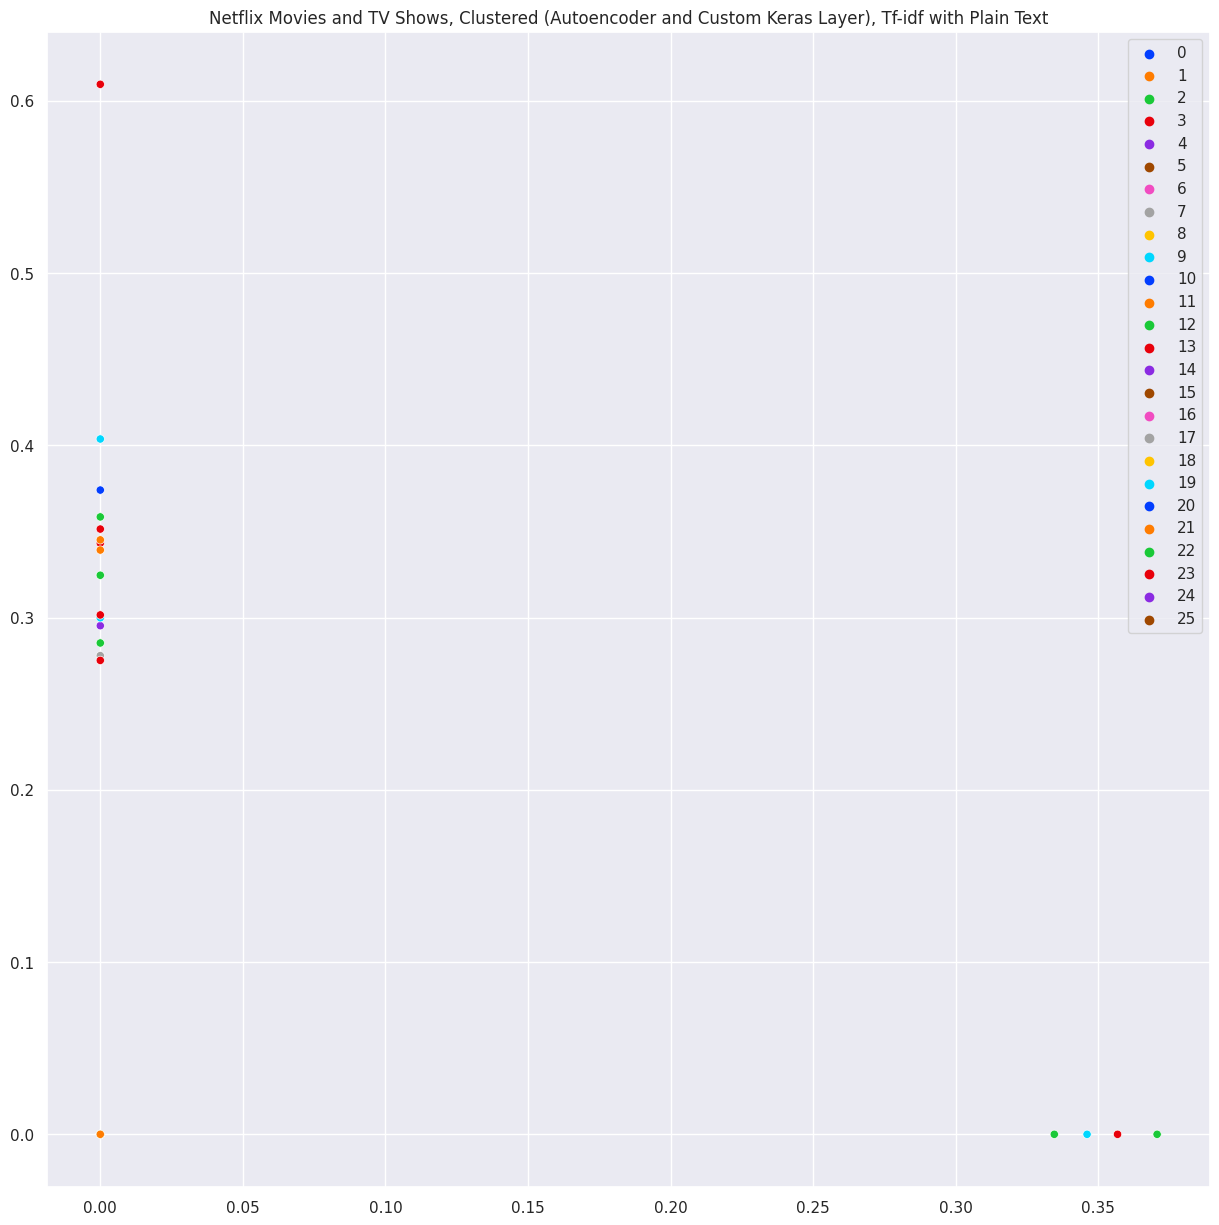

In [94]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15, 15)})

# colors
palette = sns.color_palette("bright", len(set(y_predict)))

# plot
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_predict, palette=palette)
plt.title("Netflix Movies and TV Shows, Clustered (Autoencoder and Custom Keras Layer), Tf-idf with Plain Text")
plt.savefig('output2.png')
plt.show()


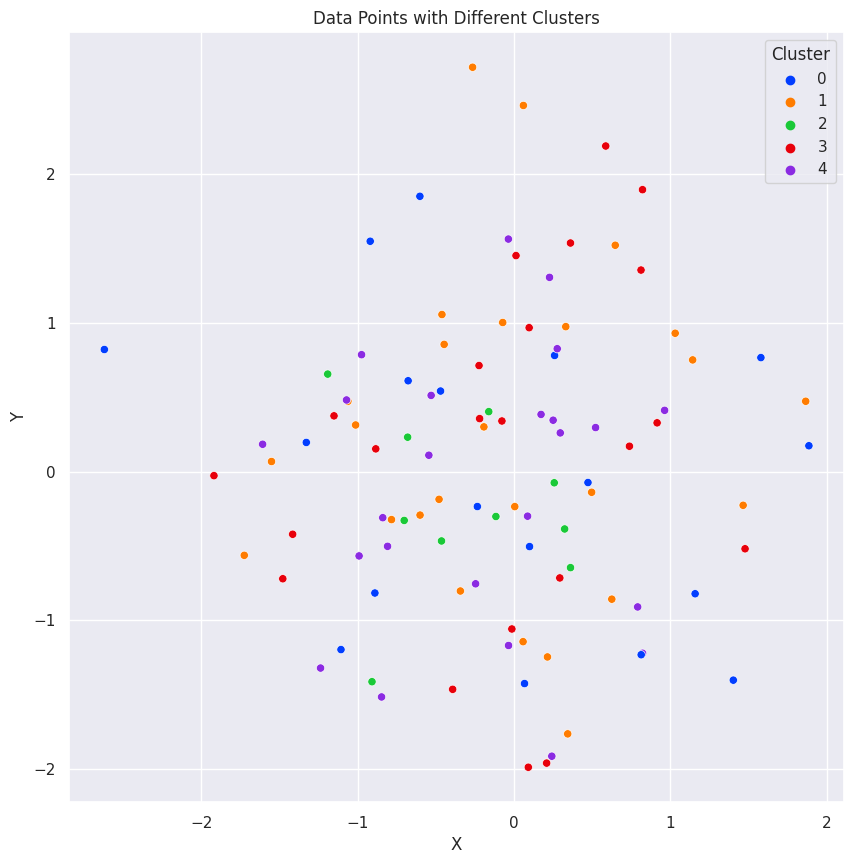

In [97]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Generate random data for demonstration
# Replace this section with your own data
np.random.seed(42)
data = np.random.randn(100, 2)
clusters = np.random.randint(0, 5, size=100)

# Convert data to DataFrame
df = pd.DataFrame(data, columns=['X', 'Y'])
df['cluster'] = clusters

# sns settings
sns.set(rc={'figure.figsize':(10, 10)})

# colors
palette = sns.color_palette("bright", len(set(df['cluster'])))

# plot
sns.scatterplot(x='X', y='Y', hue='cluster', data=df, palette=palette)
plt.title("Data Points with Different Clusters")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(title='Cluster', loc='best')
plt.show()



# **Conclusion**

* Based on the evaluation of elbow and silhouette scores, the optimal number of clusters is determined to be 26. K Means clustering is found to be more suitable for identification than Hierarchical clustering, as indicated by the evaluation metrics.

* Netflix predominantly features movies, with 5372 movies and 2398 TV shows available on the platform. The number of movies surpasses the number of TV shows, indicating a larger selection of movies for viewers.

* TV-MA, which represents adult ratings, has the highest number of ratings among TV shows. This suggests that adult-oriented content receives a significant amount of viewership and popularity on Netflix.

* The years 2017 and 2018 witnessed the highest number of movie releases on Netflix. Additionally, there was a substantial increase in the number of movies and TV episodes after 2015. However, there has been a notable decline in movie and TV episode production after 2020. This suggests a shift in focus towards increasing movie content on Netflix compared to TV shows, with movies experiencing a more significant growth.

* The period from October to January sees the highest influx of content being added to Netflix. This timeframe indicates a concentrated effort by Netflix to release and update their content library during the end of the year and the beginning of the new year.

* Documentaries emerge as the most prevalent genre on Netflix, followed by stand-up comedy, dramas, and international movies. This indicates a strong emphasis on factual and non-fictional content, as well as a diverse range of global movies.

* Kids TV shows dominate as the top genre among TV shows on Netflix, suggesting a significant focus on catering to young viewers and providing age-appropriate content.

* The majority of movies on Netflix have a duration ranging from 50 to 150 minutes, indicating a wide variety of runtime options for viewers to choose from.

* A substantial number of TV shows on Netflix consist of a single season, highlighting the prevalence of limited series or shows with a shorter run.

* Movies with an NC-17 rating tend to have the longest average duration, indicating that content with more mature themes or explicit content often requires a longer runtime. Conversely, movies with a TV-Y rating, intended for young audiences, have the shortest average runtime.

* The United States has the highest volume of content on Netflix, followed by India. This suggests that these two countries receive a significant focus in terms of content availability and viewership.

* India boasts the highest number of movies available on Netflix, further highlighting the country's significant presence in the platform's content library.

* Out of the movies on Netflix, approximately 30% were released directly on the platform, while the remaining 70% were previously released through other distribution channels before being added to Netflix.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***